In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
from scipy import stats
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/kaggle/input/trad-mill/aerofit_treadmill_data.csv')

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# Check for missing values

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
df.duplicated(subset=None,keep='first').sum()

0

The company provided small dataset of 180 datapoints. The dataset consistes of 8 features that represent buyers profiles.
For each buyer company collected his/her: age, gender, education level, marital status, usage expectation, fitness level,
income, how many miles buyer expects to walk on trad mill each time. The dataset has no missing values and no duplicated profiles at all. 

In [13]:
# basic statistic for each numerical column
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [18]:
# Categorical features
display(df.Product.value_counts())
print()
display(df.Gender.value_counts())
print()
display(df.MaritalStatus.value_counts())

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Target variable and other categorical variables don't have equal values for each category as you can see.

Text(0.5, 1.0, 'Product Distribution')

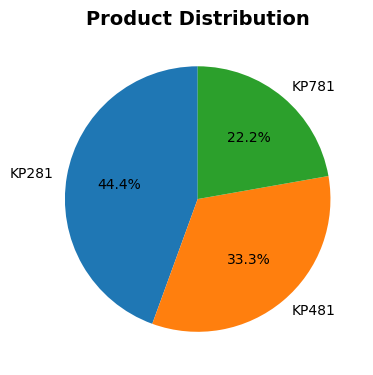

In [24]:
fig = plt.figure(figsize=(20, 25))

# 1. Product Distribution
plt.subplot(5, 3, 1)
product_counts = df['Product'].value_counts()
plt.pie(product_counts.values, labels=product_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Distribution', fontsize=14, fontweight='bold')

In [26]:
print("\n3. PRODUCT-WISE CUSTOMER PROFILES")
print("-" * 40)

# Create summary statistics by product
for product in ['KP281', 'KP481', 'KP781']:
    print(f"\n{product} Customer Profile:")
    product_data = df[df['Product'] == product]
    print(f"Number of customers: {len(product_data)} ({len(product_data)/len(df)*100:.1f}%)")
    print(f"Average Age: {product_data['Age'].mean():.1f} years")
    print(f"Average Age: {product_data['Education'].mean():.1f} years")
    print(f"Average Income: ${product_data['Income'].mean():,.0f}")
    print(f"Average Usage: {product_data['Usage'].mean():.1f} times/week")
    print(f"Average Miles: {product_data['Miles'].mean():.1f} miles/week")
    print(f"Average Fitness: {product_data['Fitness'].mean():.2f}/5")


3. PRODUCT-WISE CUSTOMER PROFILES
----------------------------------------

KP281 Customer Profile:
Number of customers: 80 (44.4%)
Average Age: 28.6 years
Average Age: 15.0 years
Average Income: $46,418
Average Usage: 3.1 times/week
Average Miles: 82.8 miles/week
Average Fitness: 2.96/5

KP481 Customer Profile:
Number of customers: 60 (33.3%)
Average Age: 28.9 years
Average Age: 15.1 years
Average Income: $48,974
Average Usage: 3.1 times/week
Average Miles: 87.9 miles/week
Average Fitness: 2.90/5

KP781 Customer Profile:
Number of customers: 40 (22.2%)
Average Age: 29.1 years
Average Age: 17.3 years
Average Income: $75,442
Average Usage: 4.8 times/week
Average Miles: 166.9 miles/week
Average Fitness: 4.62/5


The average values of numerical features don't very differentiated between K281 and K481 but significantly stand out from
mean values of KP781. And the average fitness of K481 not significantly but smaller than average fitness value of K281
customer.

**Numerical Feature Distributions**

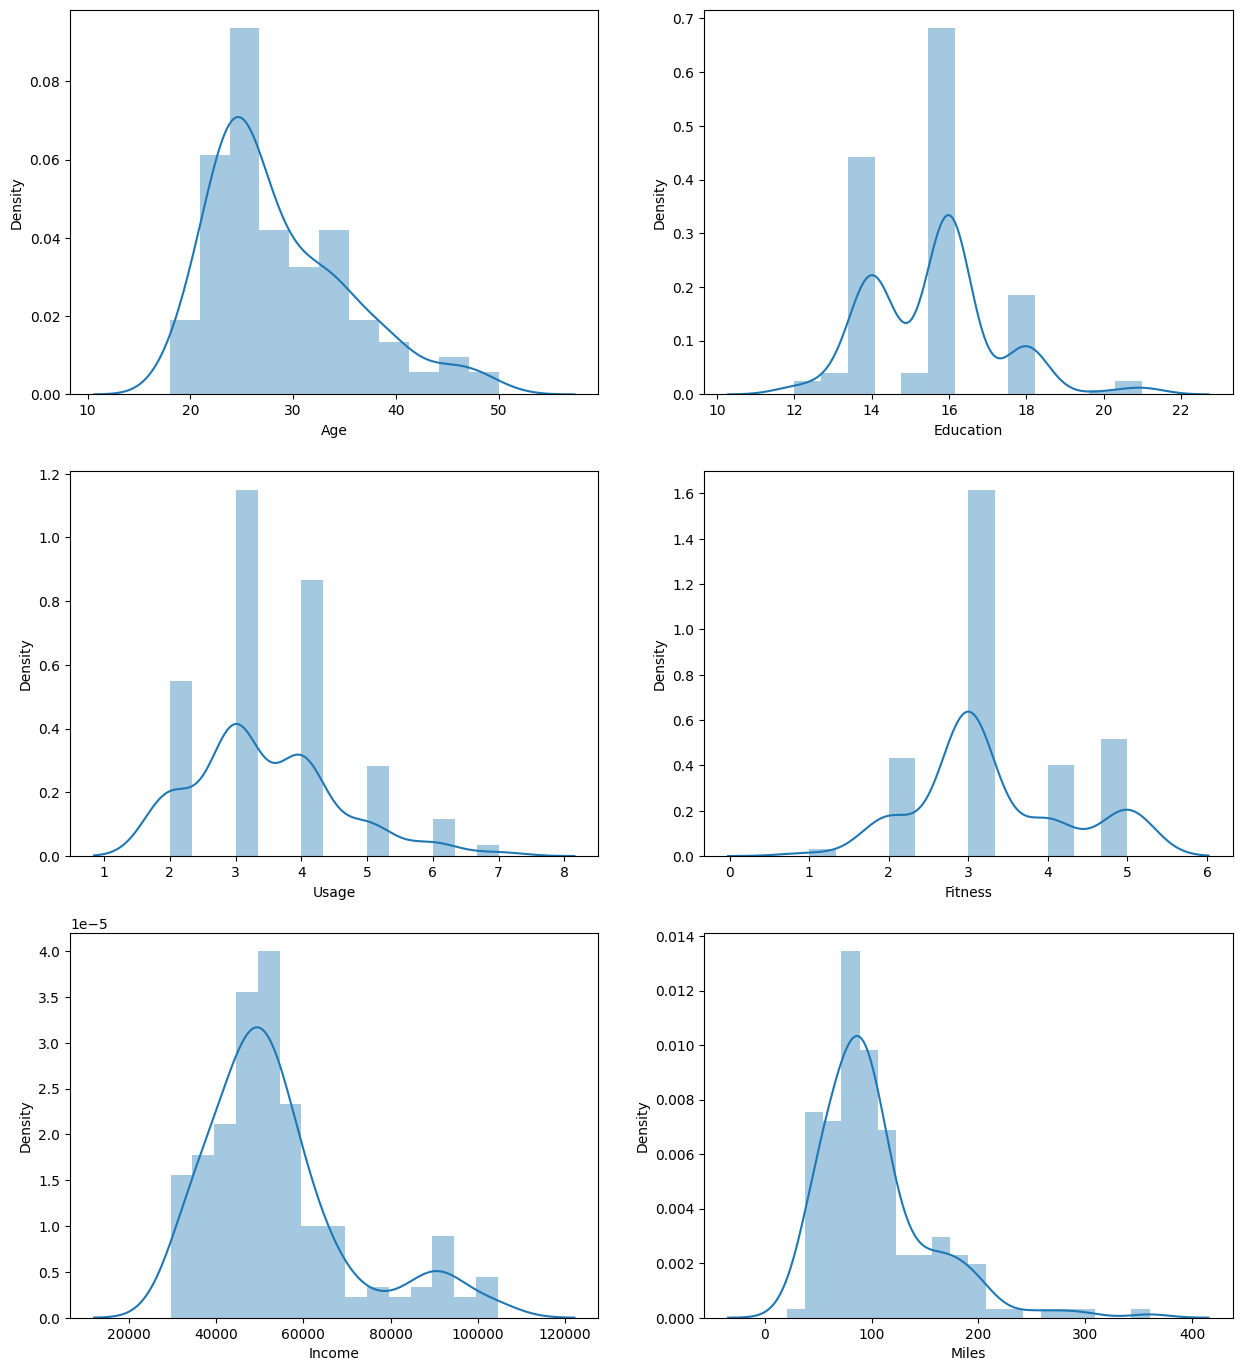

In [19]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.subplots_adjust(top=1.2)

sns.distplot(df['Age'], kde=True, ax=axis[0,0])
sns.distplot(df['Education'], kde=True, ax=axis[0,1])
sns.distplot(df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(df['Income'], kde=True, ax=axis[2,0])
sns.distplot(df['Miles'], kde=True, ax=axis[2,1])
plt.show()

Although dataset is small, however from the data we have numerical features don't have normal distributions.

**Numerical Feature Correlation**

In [25]:
np.exp(1)

2.718281828459045

In [49]:
# To include target variable product into correlation table, 
# I have to create numerical feature from it. I will use prices 
# to create such feature

price_dict = {'KP281': 1500, 'KP481': 1750, 'KP781': 2500}
df['price'] = df['Product'].map(price_dict)

In [50]:
num_cols = ['Age',  'Education', 'Usage',
       'Fitness', 'Income', 'Miles',  'price']

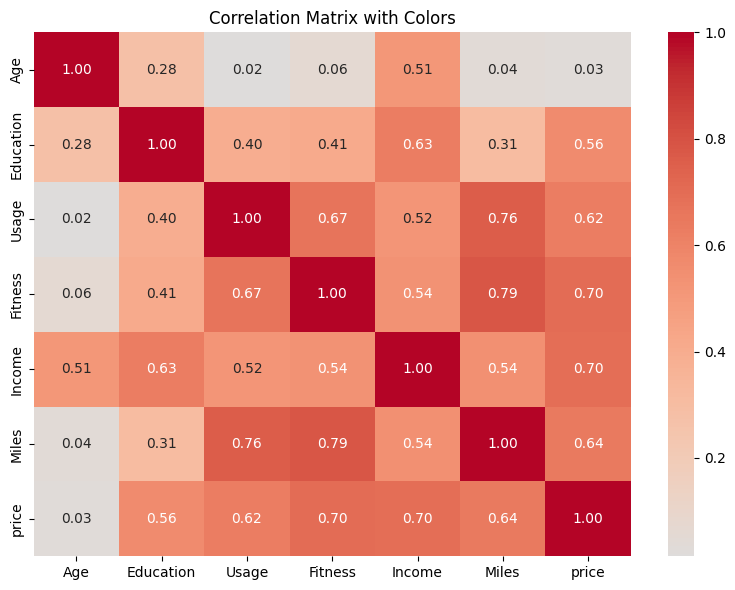

In [23]:
corr = df[num_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")

plt.title("Correlation Matrix with Colors")
plt.tight_layout()
plt.show()

The income and fitness are the most correlated features with target variable. I would say it makes sense. 
People with highest income can buy most expensive tradmill more often and people with high fitness would 
be more interested in the high end model. Age has almost no correlation with
target variable. However age has significant correlation with income and education which makes sense too. 
I would expect strong correlation between age and fitness, but their customers don't have it. There are very
strong correlations between miles, usage and fitness. It definetely is expected because people who use tradmill
a lot probably have greater stamina for more miles and probably achieved greater fitness. There is significant 
but not really expected positive correlation between education and usage, fitness, miles. I would say 
their customers with longer education statrts to value their health and physical condition more. 

# Numerical Features Distribution Accross Different Products

In [36]:
def box_plot_function(data, categorical_feature, numeric_feature):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x=categorical_feature, y=numeric_feature)
    plt.title(f'Boxplot of {numeric_feature} by Category of {categorical_feature}')
    plt.tight_layout()
    plt.show()

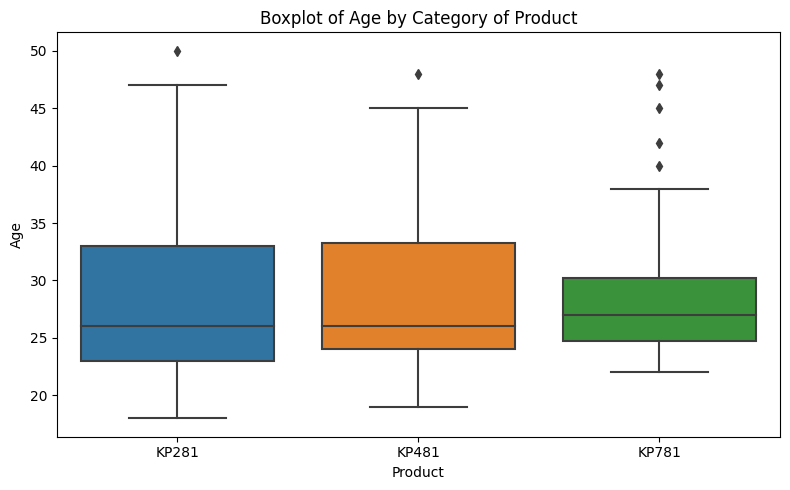

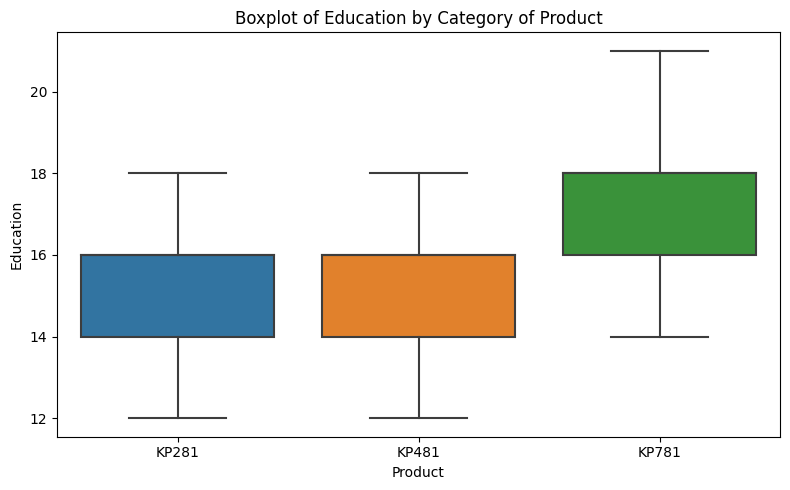

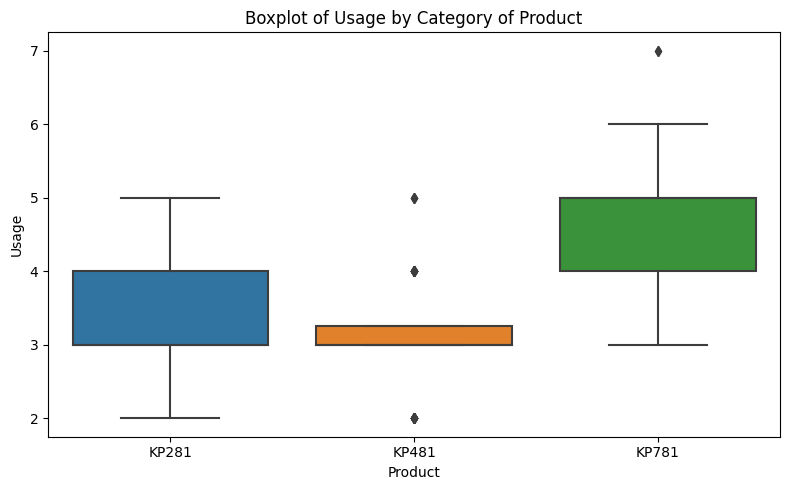

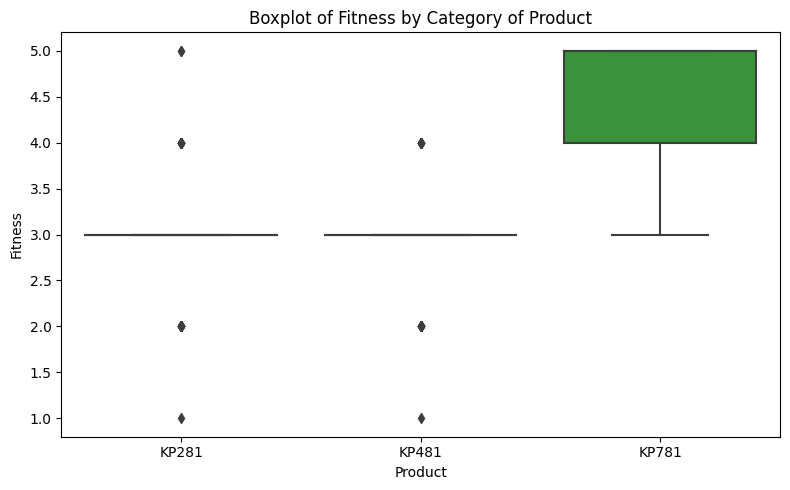

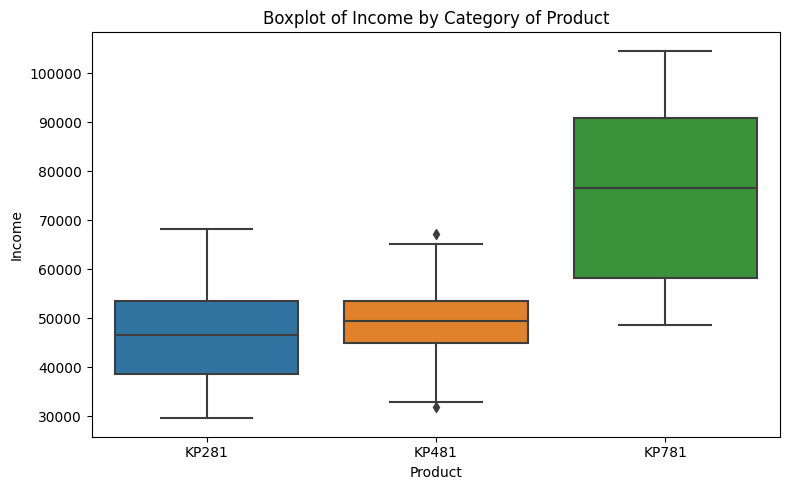

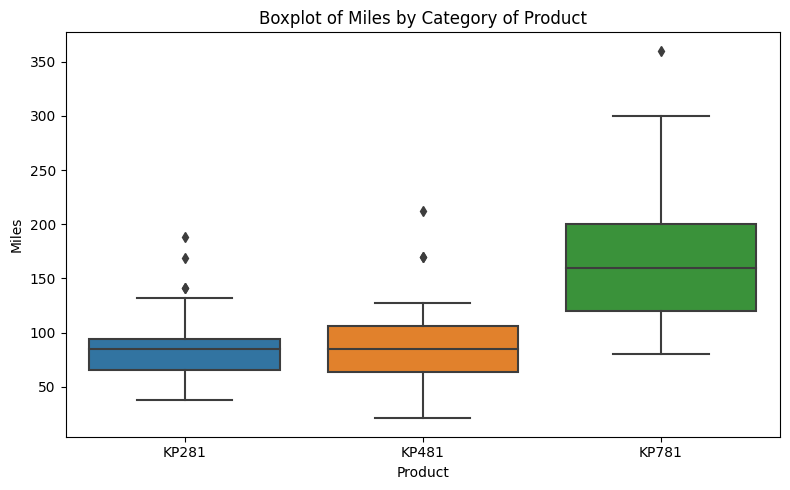

In [51]:
for col in num_cols[:-1]:
    box_plot_function(df, 'Product', col)

By the naked eye I see KP781 stands out accross all numerical features except age. 
However I don't see clear difference between KP281 and KP481.

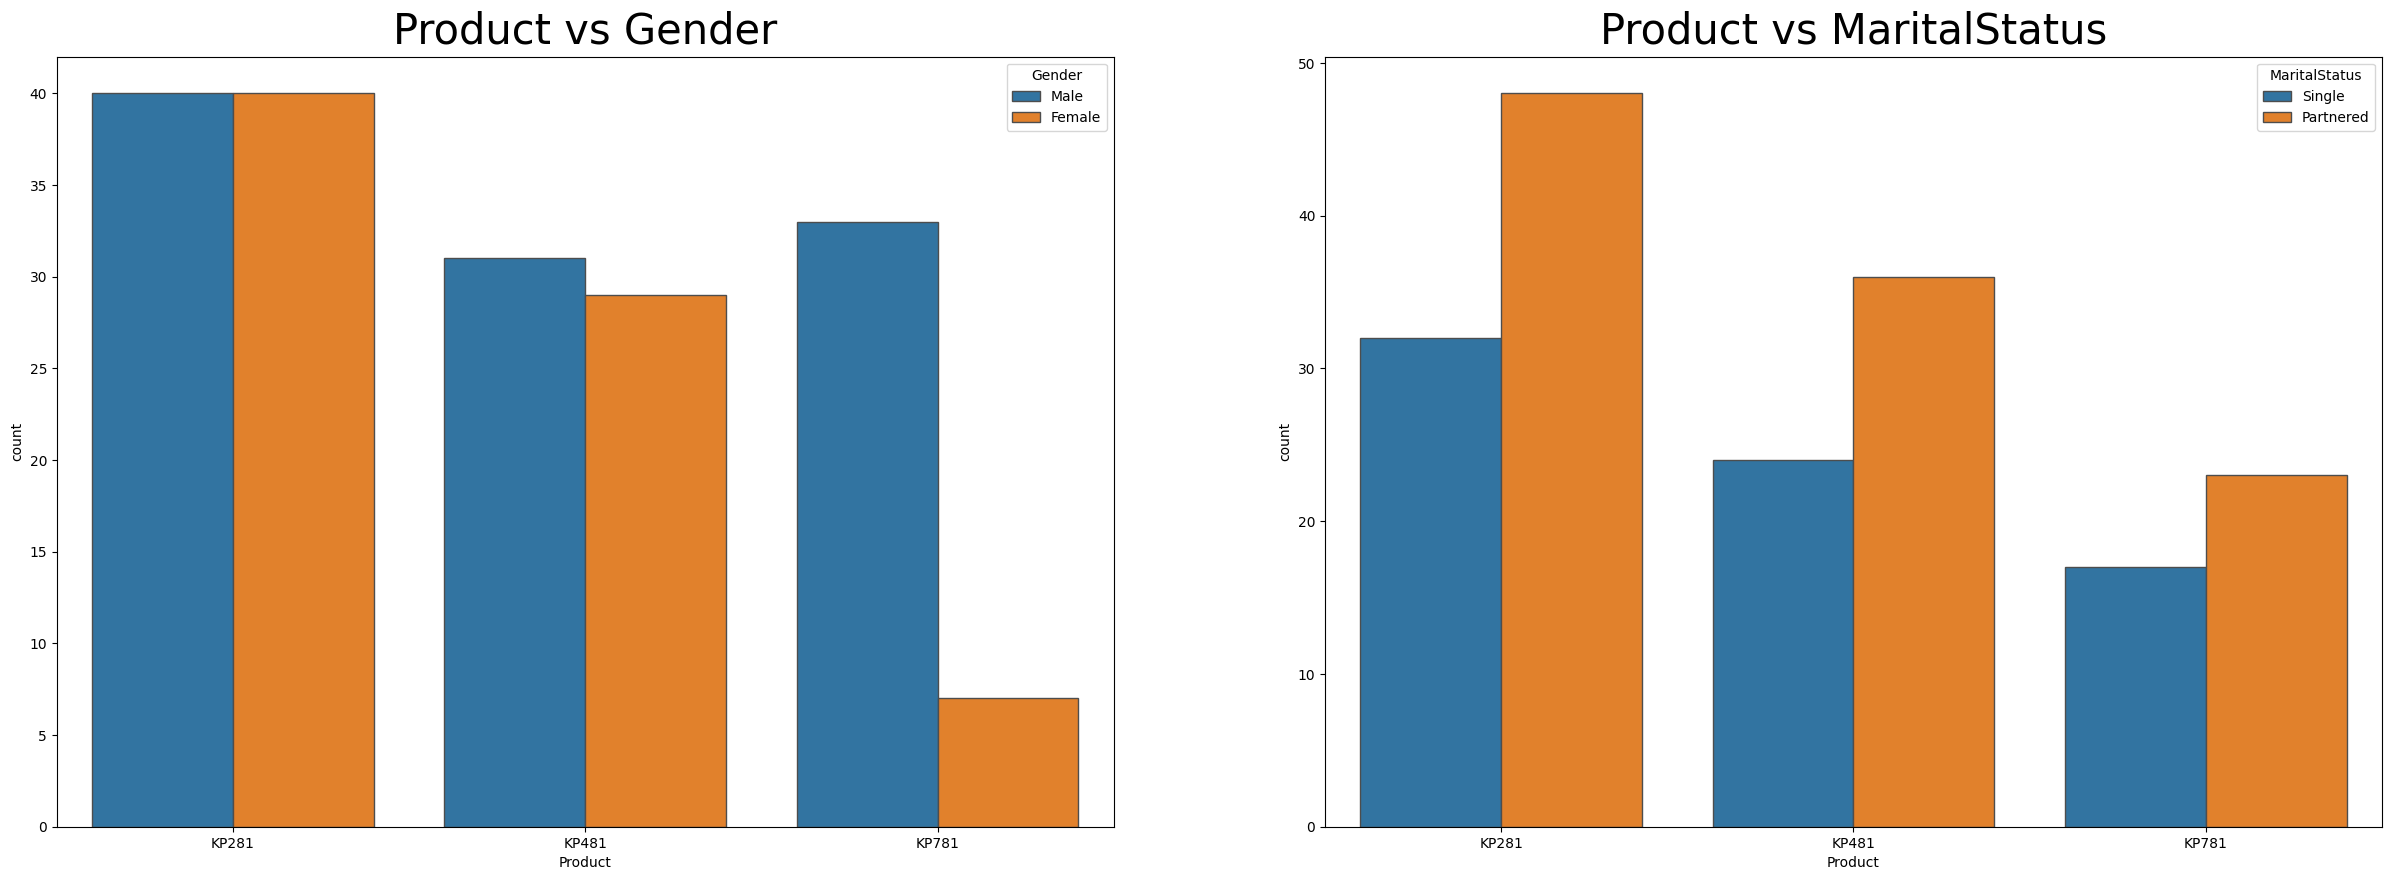

In [14]:
#Lests check how different categorical features behaves over different products

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.3", ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.3", ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=30)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=30)
plt.show()

* KP281 equally popular among males and females.
* KP481 is slightly more popular among males, however we have more Male customers in the dataset.
* KP781 is significantly more popular among males.

* Dataset has more partnered customers and we have more of them accross all products.

#  Statistical Significance Tests 

In [52]:
for var in num_cols[:-1]:
    kp281 = df[df['Product'] == 'KP281'][var]
    kp481 = df[df['Product'] == 'KP481'][var]
    kp781 = df[df['Product'] == 'KP781'][var]
    
    f_stat, p_value = stats.f_oneway(kp281, kp481, kp781)
    print(f"\n{var} across products:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("→ Significant difference between products")
    else:
        print("→ No significant difference between products")


Age across products:
F-statistic: 0.0942, p-value: 0.9101
→ No significant difference between products

Education across products:
F-statistic: 45.1904, p-value: 0.0000
→ Significant difference between products

Usage across products:
F-statistic: 65.4445, p-value: 0.0000
→ Significant difference between products

Fitness across products:
F-statistic: 104.0013, p-value: 0.0000
→ Significant difference between products

Income across products:
F-statistic: 89.2590, p-value: 0.0000
→ Significant difference between products

Miles across products:
F-statistic: 68.2418, p-value: 0.0000
→ Significant difference between products


The result is no surprising as boxplot showed above there is no visible differentiation for the age feature
accross products. All other numerical features show numerical significance accross products. However
I suspect we have statistical signifcance thanks to KP781. So I will check later statistical
significance of numerical features accross only KP281 and KP481.

In [53]:
for var in num_cols[:-1]:
    kp281 = df[df['Product'] == 'KP281'][var]
    kp481 = df[df['Product'] == 'KP481'][var]
    
    
    f_stat, p_value = stats.f_oneway(kp281, kp481)
    print(f"\n{var} across products:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("→ Significant difference between products")
    else:
        print("→ No significant difference between products")


Age across products:
F-statistic: 0.0862, p-value: 0.7695
→ No significant difference between products

Education across products:
F-statistic: 0.1446, p-value: 0.7043
→ No significant difference between products

Usage across products:
F-statistic: 0.0238, p-value: 0.8775
→ No significant difference between products

Fitness across products:
F-statistic: 0.3171, p-value: 0.5743
→ No significant difference between products

Income across products:
F-statistic: 2.8283, p-value: 0.0949
→ No significant difference between products

Miles across products:
F-statistic: 0.9553, p-value: 0.3301
→ No significant difference between products


There is no clear difference between KP281 and KP481 accross all numerical features.

# Multivariate Analysis

In [58]:
def multivar_analysis(data, num_features, cat_feature):
    sns.set(color_codes = True)
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
    fig.subplots_adjust(top=1.3)
    count = 0
    for i in range(3):
        for j in range(2):
            sns.boxplot(data=data, x=cat_feature, y=num_features[count], hue='Product', ax=axs[i,j])
            axs[i,j].set_title(f"Product vs {num_features[count]}", pad=12, fontsize=13)
            count+=1

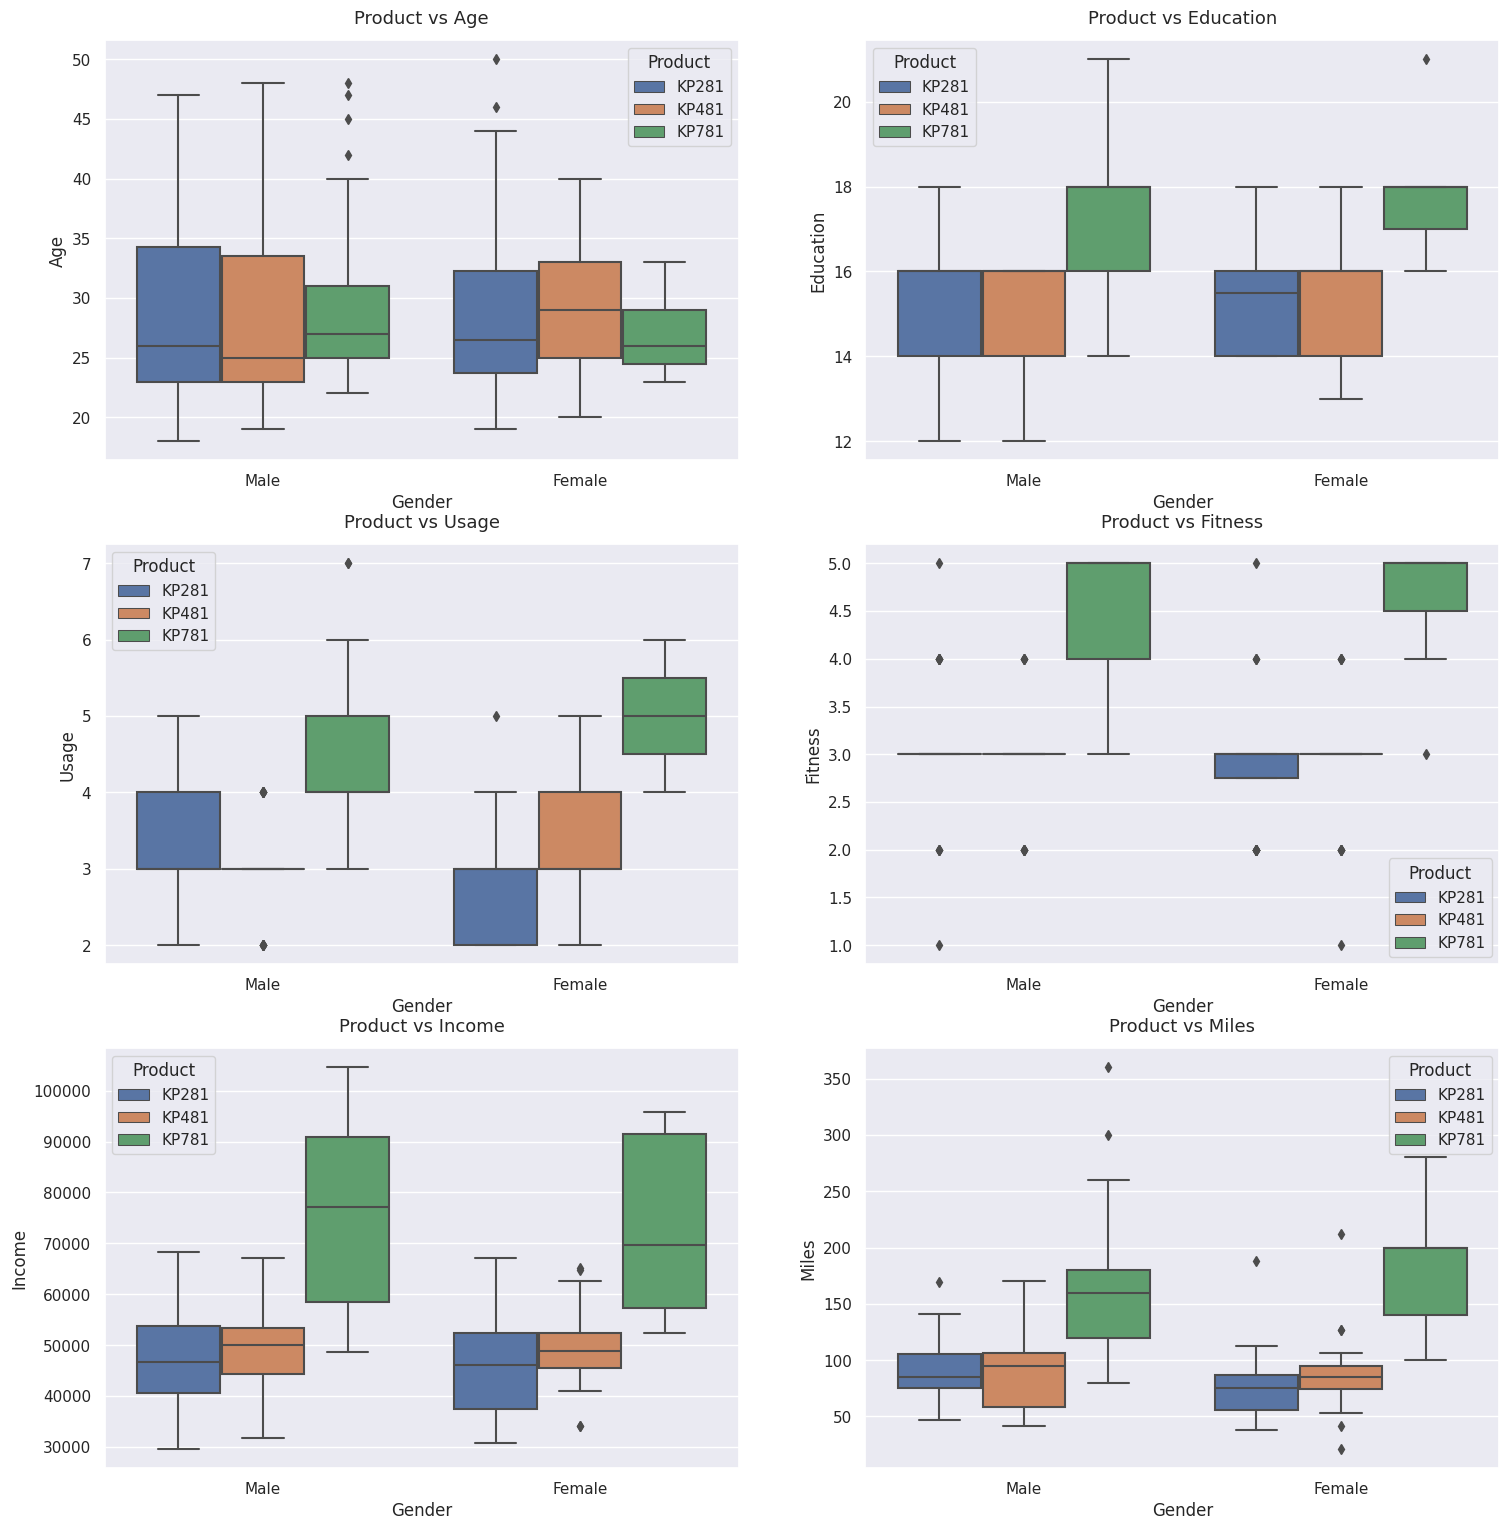

In [59]:
multivar_analysis(df, num_cols, 'Gender')

Categorical feature gender doesn't really gives a lot of differences accross other numerical features.
I can see accross femal usage KP481 stands out from KP281, but I will check if it is significant difference.

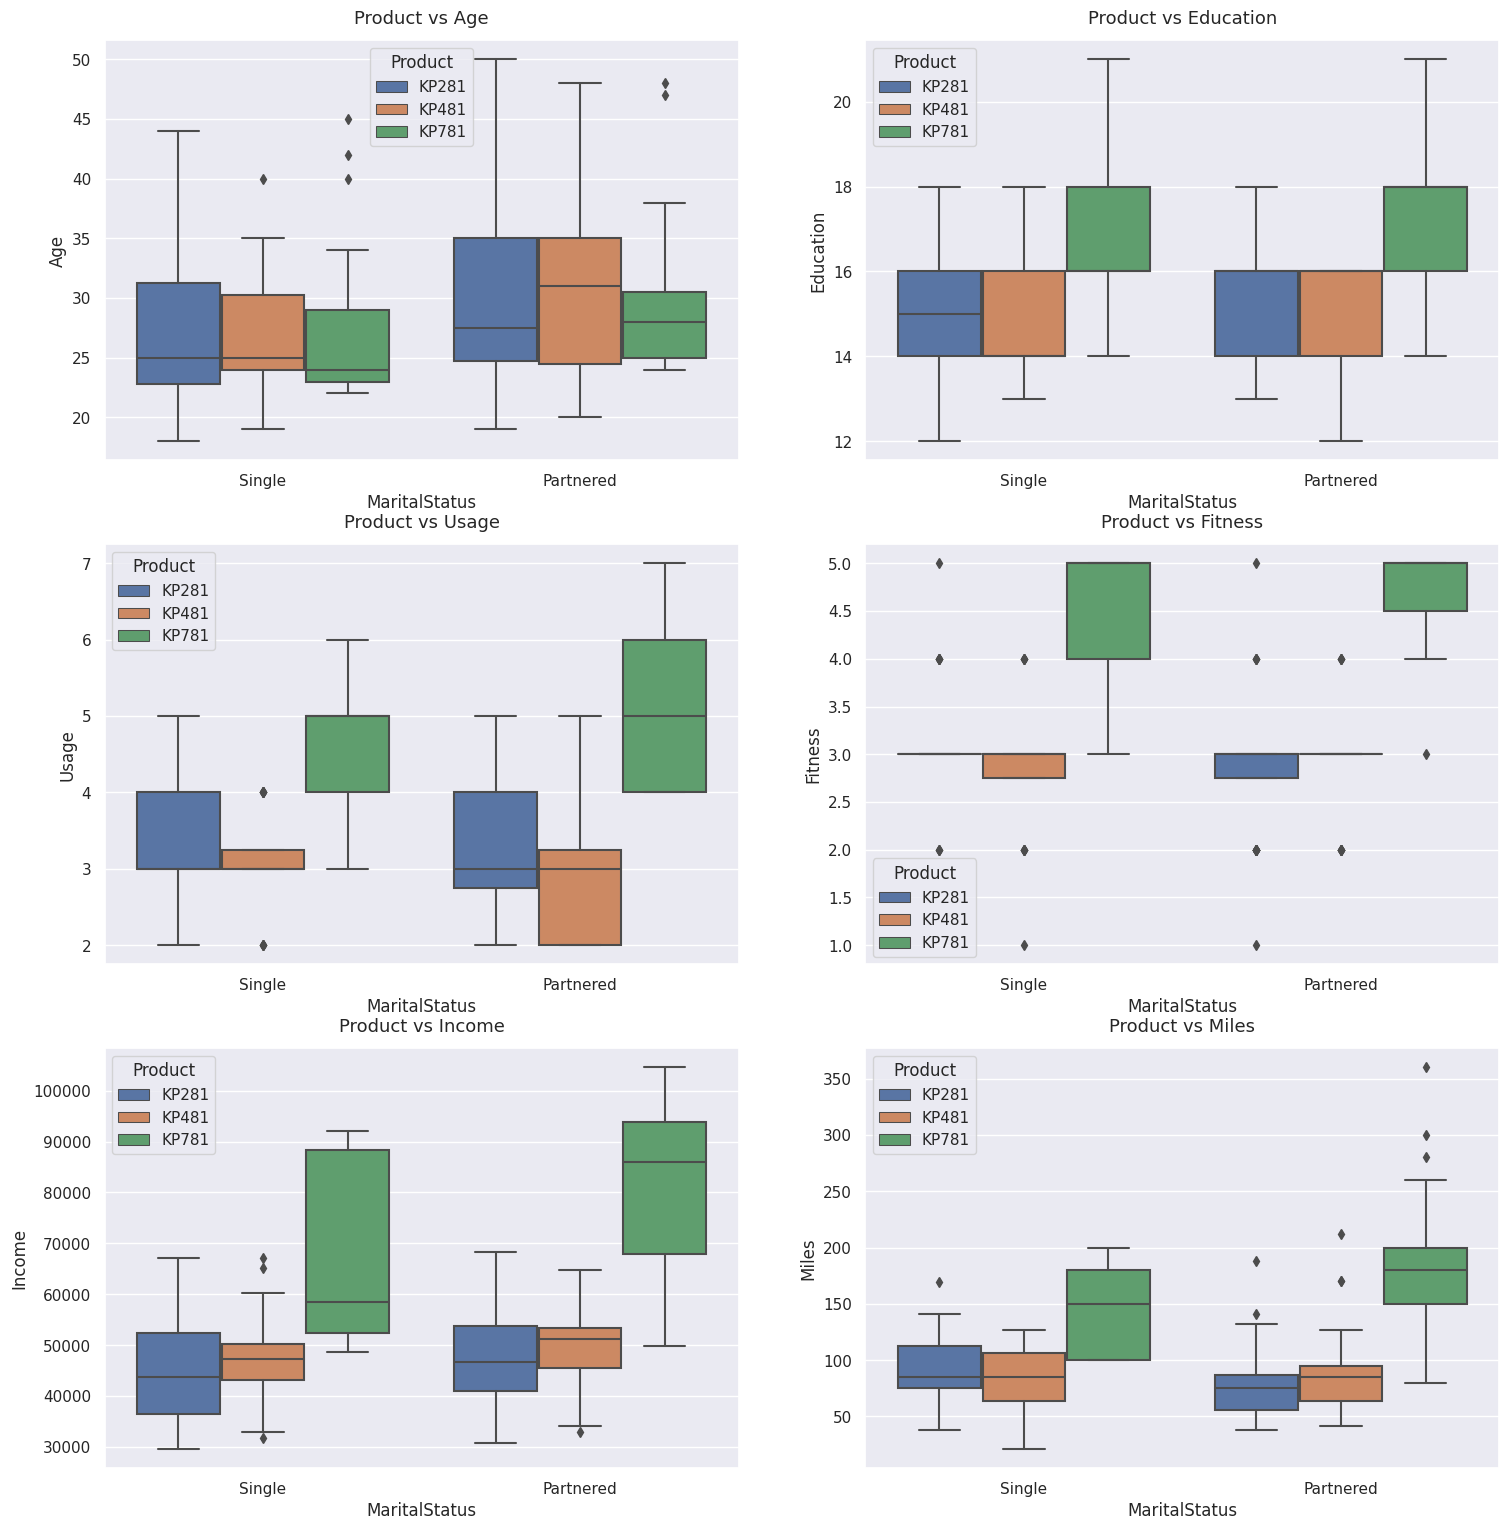

In [60]:
multivar_analysis(df, num_cols, 'MaritalStatus')

People older than 38 are not really interested in KP781 specially women, I would say for women over 33 KP781
is not really interesting product. Even male with education less than 14 years not really interested in KP781.
Customers with education greater than 18 years are not really buying KP281 and KP481. Females with usage over 4
not really buying KP281. Females with fitness above 4 only potential buyers of KP781.

# Contingency Tables

In [8]:
print("\n4. CONTINGENCY TABLES AND CONDITIONAL PROBABILITIES")
print("-" * 40)

# Function to create and analyze contingency tables
def analyze_contingency(df, product, var1, var2):
    print(f"\n{product}: {var1} vs {var2}")
    print("-" * 30)
    
    # Filter data for specific product
    product_data = df[df['Product'] == product]
    
    # Create contingency table
    contingency = pd.crosstab(product_data[var1], product_data[var2], margins=True)
    print("\nContingency Table:")
    print(contingency)
    
    # Calculate probabilities
    total = contingency.loc['All', 'All']
    
    # Marginal probabilities
    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
    print(product)
    print(f"\nMarginal Probabilities for {var1}:")
    for idx in contingency.index[:-1]:
        prob = contingency.loc[idx, 'All'] / total
        print(f"P({var1}={idx}) = {prob:.3f}")
    
    print(f"\nMarginal Probabilities for {var2}:")
    for col in contingency.columns[:-1]:
        prob = contingency.loc['All', col] / total
        print(f"P({var2}={col}) = {prob:.3f}")
    
    # Conditional probabilities
    print(f"\nConditional Probabilities P({var1}|{var2}):")
    for col in contingency.columns[:-1]:
        print(f"\nGiven {var2}={col}:")
        for idx in contingency.index[:-1]:
            if contingency.loc['All', col] > 0:
                prob = contingency.loc[idx, col] / contingency.loc['All', col]
                print(f"  P({var1}={idx}|{var2}={col}) = {prob:.3f}")
    
    return contingency


4. CONTINGENCY TABLES AND CONDITIONAL PROBABILITIES
----------------------------------------


In [9]:
# Analyze key relationships for each product
for product in ['KP281', 'KP481', 'KP781']:
    print(f"\n{'='*50}")
    print(f"ANALYSIS FOR {product}")
    print(f"{'='*50}")
    
    # Gender vs MaritalStatus
    analyze_contingency(df, product, 'Gender', 'MaritalStatus')
    
    # Create fitness categories for analysis
    df['FitnessCategory'] = pd.cut(df['Fitness'], bins=[0, 2, 3, 5], labels=['Low', 'Medium', 'High'])
    analyze_contingency(df, product, 'Gender', 'FitnessCategory')


ANALYSIS FOR KP281

KP281: Gender vs MaritalStatus
------------------------------

Contingency Table:
MaritalStatus  Partnered  Single  All
Gender                               
Female                27      13   40
Male                  21      19   40
All                   48      32   80
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
KP281

Marginal Probabilities for Gender:
P(Gender=Female) = 0.500
P(Gender=Male) = 0.500

Marginal Probabilities for MaritalStatus:
P(MaritalStatus=Partnered) = 0.600
P(MaritalStatus=Single) = 0.400

Conditional Probabilities P(Gender|MaritalStatus):

Given MaritalStatus=Partnered:
  P(Gender=Female|MaritalStatus=Partnered) = 0.562
  P(Gender=Male|MaritalStatus=Partnered) = 0.438

Given MaritalStatus=Single:
  P(Gender=Female|MaritalStatus=Single) = 0.406
  P(Gender=Male|MaritalStatus=Single) = 0.594

KP281: Gender vs FitnessCategory
------------------------------

Contingency Table:
FitnessCategory  Low  Medium  High  All
Gender                                 
F

# Decision Tree

In [11]:
sex_dic = {'Male': 1, 'Female': 0}
df['sex'] = df['Gender'].map(sex_dic)

mar_status_dic = {'Partnered': 1, 'Single': 0}
df['mar_status'] = df['MaritalStatus'].map(mar_status_dic)

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

features = ['Age', 'sex', 'Education', 'mar_status', 'Usage',
       'Fitness', 'Income', 'Miles']

X = df[features]
y = df.Product


clf = DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_leaf = 14)  # Limit depth for easier visualization
clf.fit(X, y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, random_state=42)

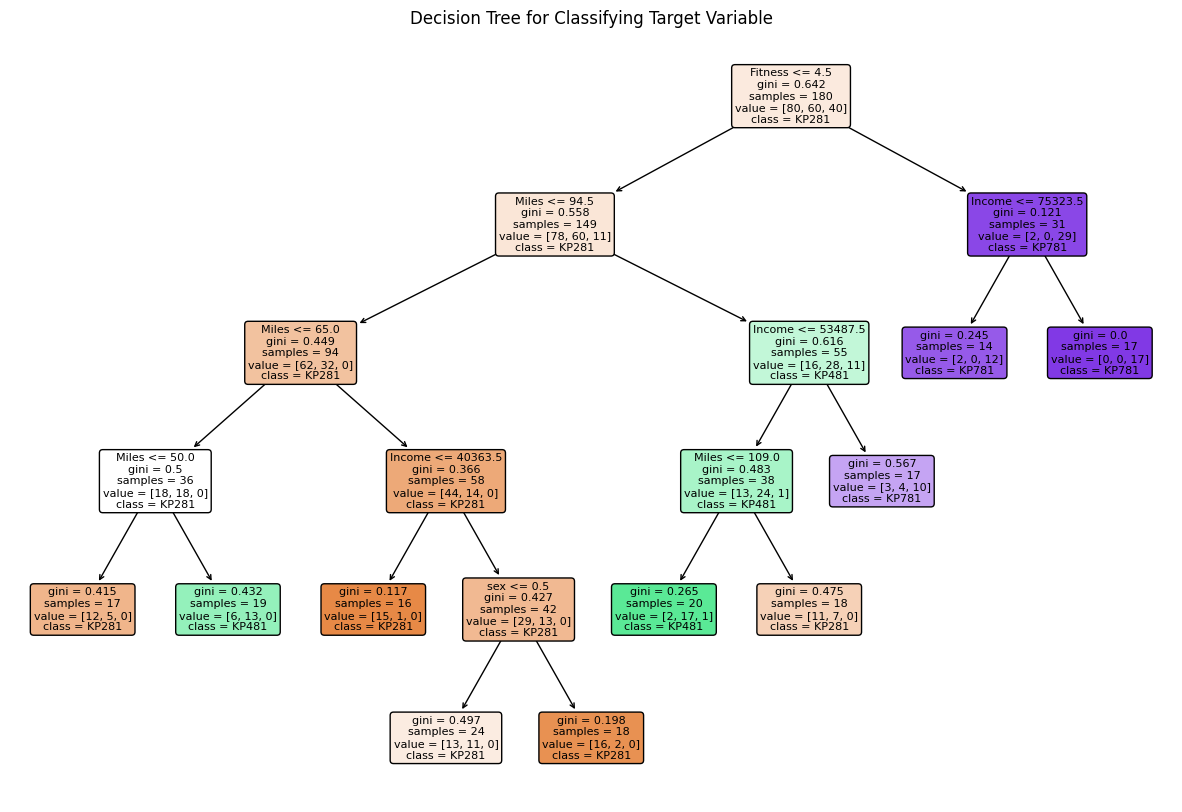

In [20]:
plt.figure(figsize=(15, 10))
plot_tree(clf, 
          feature_names=X.columns,   # names of the features
          class_names=clf.classes_,  # class labels
          filled=True,               # fill boxes with color
          rounded=True,              # round box corners
          fontsize=8)
plt.title("Decision Tree for Classifying Target Variable")
plt.show()

As expected KP781 easily separated by decision tree. Fitness greater than 4.5 or combination of 
miles greater than 94.5 with education greater than 17 is KP781 Customer.
There is the leaf with relevant low gini of 0.265 with 20 samples in it and it has class KP481. 
People with fitness less than 4.5, who use it for more than 94.5 with income less 53500 are KP481 customers
with greate probability.

Customer Profiles for Each Treadmill
KP281 (Entry-level, $1,500)

Demographics: Youngest customers (avg age 24), predominantly male (60%), mostly single (58%)
Income: Lowest income group (~$47,000/year)
Usage Pattern: Moderate usage (3-4 times/week), average fitness level
Target Market: Students, young professionals, fitness beginners

KP481 (Mid-level, $1,750)

Demographics: Middle-aged (avg age 29), balanced gender distribution, 60% partnered
Income: Middle income (~$49,000/year)
Usage Pattern: Regular usage (4 times/week), good fitness levels
Target Market: Established professionals, family households, regular exercisers

KP781 (Advanced, $2,500)

Demographics: Older customers (avg age 29), predominantly male (75-80%), mostly partnered (80%)
Income: Highest income group (~$76,000/year)
Usage Pattern: Heavy usage (5+ times/week), excellent fitness levels, run most miles
Target Market: Serious runners, fitness enthusiasts, high-income professionals

Key Business Insights

Clear Market Segmentation: Each product appeals to a distinct customer segment based on income, fitness level, and usage intensity.
Price-Income Correlation: There's a strong correlation between product price and customer income, with KP781 buyers earning 60% more than KP281 buyers.
Usage Intensity: Higher-priced models attract more intensive users, with KP781 customers using the treadmill 40% more frequently than KP281 customers.
Gender Dynamics: Entry and advanced models show gender skew (male-dominated), while the mid-level model has balanced appeal.

Marketing Recommendations

KP281: Market to college students and young professionals emphasizing affordability and ease of use
KP481: Target families and couples highlighting versatility and value for money
KP781: Focus on serious athletes and high earners showcasing advanced features and durability